### DEMO ALGORITHMS FOR RANDOM DATASET(WEATHER FORECAST)

Descriptive Statistics:
        Temperature     Humidity   Wind_Speed  Cloud_Cover     Pressure
count  2500.000000  2500.000000  2500.000000  2500.000000  2500.000000
mean     22.581725    64.347094     9.906255    49.658104  1014.312336
std       7.326996    19.954739     5.780316    29.123104    20.196433
min      10.001842    30.005071     0.009819     0.015038   980.014486
25%      16.359398    47.339815     4.761909    23.900016   996.938630
50%      22.536448    63.920797     9.908572    49.488284  1013.433035
75%      28.976476    81.561021    14.948408    75.324140  1031.735067
max      34.995214    99.997481    19.999132    99.997795  1049.985593
Correlation Matrix:
              Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
Temperature     1.000000 -0.014119   -0.004957     0.006632 -0.007489
Humidity       -0.014119  1.000000    0.003816     0.007244 -0.032089
Wind_Speed     -0.004957  0.003816    1.000000    -0.000405  0.018772
Cloud_Cover     0.006632  0.007244 

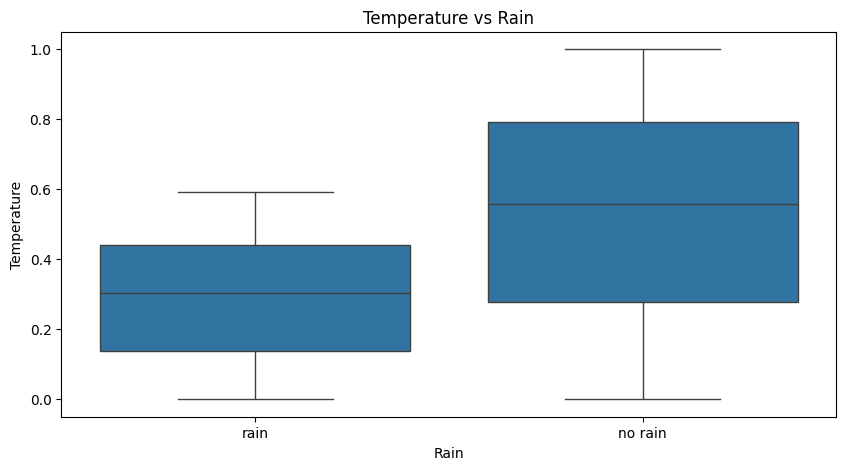

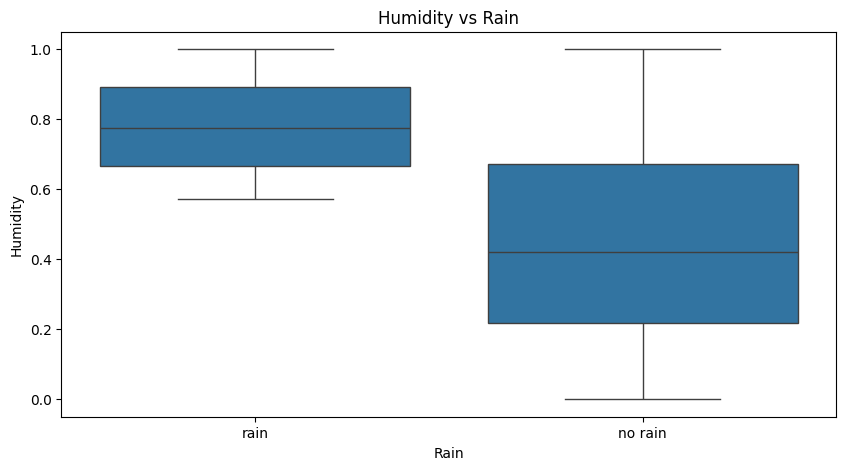

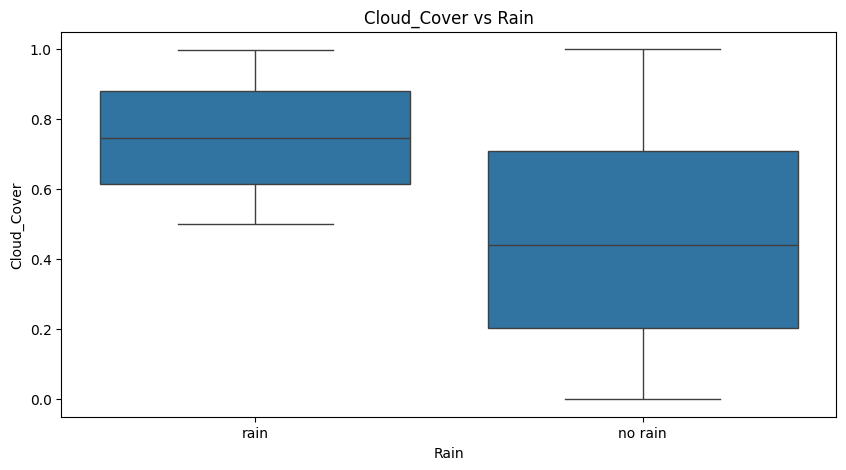

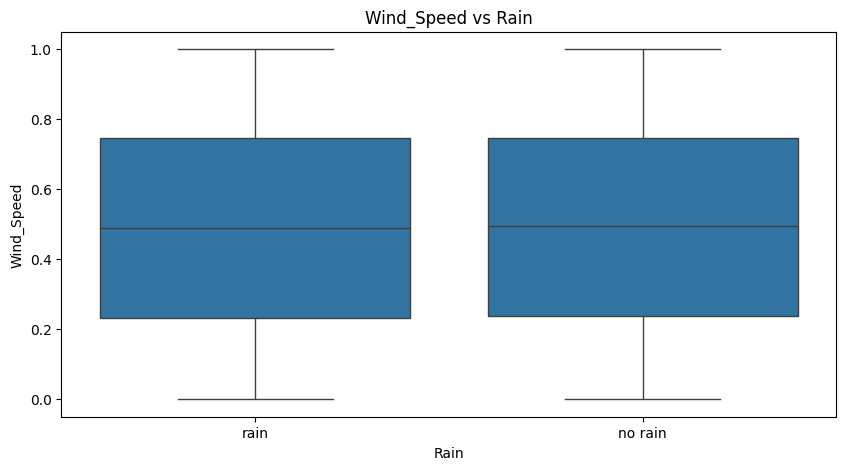

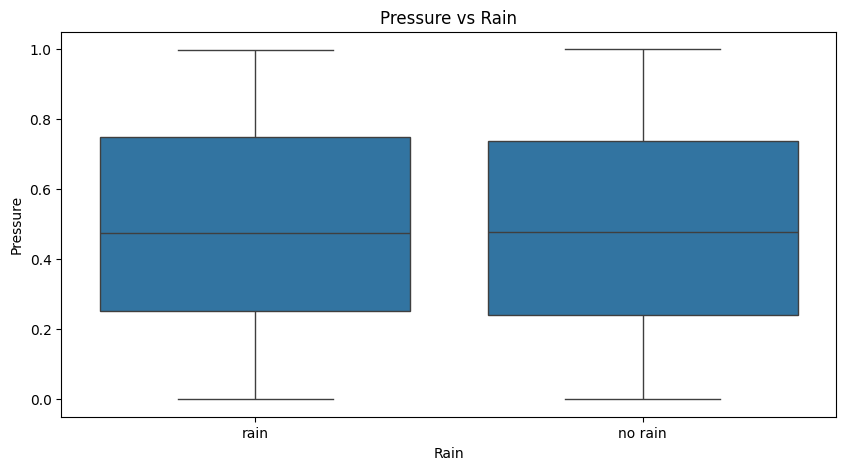

Temperature - T-statistic: -13.784940386488017, P-value: 1.0162396577906272e-41 
-> Có sự khác biệt có ý nghĩa thống kê giữa Rain và No Rain cho Temperature.
Humidity - T-statistic: 20.688500897077418, P-value: 6.811072669234164e-88 
-> Có sự khác biệt có ý nghĩa thống kê giữa Rain và No Rain cho Humidity.
Wind_Speed - T-statistic: -0.06942745832484516, P-value: 0.9446549300435457 
-> Không có sự khác biệt có ý nghĩa thống kê cho Wind_Speed.
Cloud_Cover - T-statistic: 17.24780058059219, P-value: 4.526711904031615e-63 
-> Có sự khác biệt có ý nghĩa thống kê giữa Rain và No Rain cho Cloud_Cover.
Pressure - T-statistic: 0.41351106254356285, P-value: 0.6792677145390498 
-> Không có sự khác biệt có ý nghĩa thống kê cho Pressure.


In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import scipy.stats as stats

# Đọc dữ liệu từ file CSV
df = pd.read_csv('weather_forecast_data.csv')

# 1. Tiền xử lý dữ liệu
# Loại bỏ các giá trị thiếu và các bản ghi trùng lặp
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
 
#2.Mô tả thống kê cơ bản
#Tính toán các thống kê cơ bản
print("Descriptive Statistics:\n", df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']].describe())

#3. Phân tích phân tán và tương quan
#Tính hệ số tương quan giữa các biến
correlation_matrix = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']].corr()
print("Correlation Matrix:\n", correlation_matrix)

#Tính phương sai và độ lệch chuẩn cho các biến quan trọng
std_dev = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']].std()
variance = df[['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']].var()
print("Standard Deviation:\n", std_dev)
print("Variance:\n", variance)

#4. Chuẩn hóa dữ liệu
df['Temperature'] = (df['Temperature'] - df['Temperature'].min()) / (df['Temperature'].max() - df['Temperature'].min())
df['Humidity'] = (df['Humidity'] - df['Humidity'].min()) / (df['Humidity'].max() - df['Humidity'].min())
df['Wind_Speed'] = (df['Wind_Speed'] - df['Wind_Speed'].min()) / (df['Wind_Speed'].max() - df['Wind_Speed'].min())
df['Cloud_Cover'] = (df['Cloud_Cover'] - df['Cloud_Cover'].min()) / (df['Cloud_Cover'].max() - df['Cloud_Cover'].min())
df['Pressure'] = (df['Pressure'] - df['Pressure'].min()) / (df['Pressure'].max() - df['Pressure'].min())

#5. PHân tích dữ liệu khám phá (EDA)
# Danh sách các biến liên tục
continuous_columns = ['Temperature', 'Humidity', 'Cloud_Cover', 'Wind_Speed', 'Pressure']
# Vẽ Box Plot cho mỗi yếu tố liên tục theo Rain
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Rain', y=col, data=df)
    plt.title(f'{col} vs Rain')
    plt.xlabel('Rain')
    plt.ylabel(col)
    plt.show()

#6. Phân tích thống kê
#T-test cho từng yếu tối đối với rain/ no rain
# Kiểm tra sự khác biệt giữa các nhóm Rain/No Rain cho từng yếu tố
factors = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

for factor in factors:
    rain_data = df[df['Rain'] == 'rain'][factor]
    no_rain_data = df[df['Rain'] == 'no rain'][factor]
    
    # Thực hiện t-test giữa Rain và No Rain cho mỗi yếu tố
    t_stat, p_value = stats.ttest_ind(rain_data, no_rain_data)
    print(f'{factor} - T-statistic: {t_stat}, P-value: {p_value} ')
    
    #7. Phân tích hậu kiểm nếu có sự khác biệt đáng kể
    if p_value < 0.05:
        print(f"-> Có sự khác biệt có ý nghĩa thống kê giữa Rain và No Rain cho {factor}.")
    else:
        print(f"-> Không có sự khác biệt có ý nghĩa thống kê cho {factor}.")




## Kết luận
-Yếu tố như Temperature, Humidity, Cloud_Cover có thể ảnh hưởng tới việc rain/ no_rain và có thể dùng để dự đoán khả năng mưa.